<a href="https://colab.research.google.com/github/cindytrac/DS3010-Group11/blob/main/Copy_of_CaseStudy1_Twitter_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1 : Collecting Data from Twitter**

**GROUP 11 Members:** 
  
    Joshua DeOliveira
    Aruzhan Koshkarova
    Cindy Trac
    Tiffany Wee Sit


<img src="https://logos-download.com/wp-content/uploads/2016/02/Twitter_Logo_new-700x569.png">

# ***Problem 1 (20 points): Sampling Twitter Data with the Search API about a certain topic***

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Search API to sample a collection of tweets about this topic. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

Connecting to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Twitter API

In [3]:
! pip install twitter

     |████████████████████████████████| 50 kB 4.0 MB/s 


Import Libraries

In [96]:
import twitter
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

! pip install prettytable
from prettytable import PrettyTable

from collections import Counter

import sys
import time
from urllib.error import URLError
from http.client import BadStatusLine

Setting Up Twitter Credentials

In [97]:
# see https://developer.twitter.com/docs/auth/oauth for more information 

# function to login into Twitter API
def oauth_login():
   
    CONSUMER_KEY = 'BuM83EJtmJh1DwbcbH4hrrDlU'
    CONSUMER_SECRET ='2LSJmolp5nHGFBJLyX8qU49OPUrPnbDdFvzc1Ubjx37ZDVjqR5'
    OAUTH_TOKEN = '571213367-G5NlqkE11GSERNhXTelqZdgqeSGH7jmyhOFKOx8u'
    OAUTH_TOKEN_SECRET = 'D6OKIjFkuvbgAzhbueSca51yxy5LBdniz3CaozkMdaXRe'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()

Gathering the Data (Tweets) + Saving to Local File (data.json)

In [98]:
# key word
q = '#NFT'

# number of tweets we want
total_results = []
id_table = []
count = 1000 # Number of desired tweets
query = True #true if you want a brand new query, false if you want to use pre-existing data
query_complete = False #always keep false

#While we want to query and the full request isn't complete, pull from twitter and add to JSON
while query and (not query_complete):
    search_results = twitter_api.search.tweets(q=q, count=count)
    tmp_statuses = search_results['statuses']
    total_results = total_results + tmp_statuses
    print(f"Gathered [{len(total_results)}/{count}] tweets")
    if len(total_results) >= count:
      query_complete = True
      print("Done Querying")



if query:
  # open and write to json file
  with open("data.json", "w") as outfile:
      json.dump(total_results, outfile)

#now load all tweets from json
f = open('data.json',)
total_results = json.load(f)

statuses = total_results
status_texts = [status['text'] for status in statuses ]

print(statuses)


Gathered [100/1000] tweets
Gathered [200/1000] tweets
Gathered [300/1000] tweets
Gathered [400/1000] tweets
Gathered [498/1000] tweets
Gathered [593/1000] tweets
Gathered [688/1000] tweets
Gathered [787/1000] tweets
Gathered [887/1000] tweets
Gathered [987/1000] tweets
Gathered [1087/1000] tweets
Done Querying


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Parsing + Exploring Data

In [100]:
# compute a collection of all words from all tweets
words = [ w
          for t in status_texts
              for w in t.split() ]

user_mentions = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
'''
screen_name = [ user_name['screen_name']
                 for status in statuses
                     for user_name in status['entities']['user']['screen_name'] ]
'''

hashtags = [ hashtag['text']
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# getting info BY TWEET

hashtag_by_tweet = []
for i in range(len(statuses)):
  hashtag_by_tweet.append([hashtag['text'] for hashtag in statuses[i]['entities']['hashtags']])

words_by_tweet = []
for i in range(len(status_texts)):
  words_by_tweet.append([w for w in status_texts[i].split()])



### Some statistics about the tweets we collected:

* The topic of interest: **Nonfungible Tokens**


* The total number of tweets collected:  **1,000**

*-----------------------

# ***Problem 2 (20 points): Analyzing Tweets and Tweet Entities with Frequency Analysis***

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

[('RT', 1087), ('to', 417), ('#NFT', 354), ('&amp;', 342), ('To', 284), ('the', 263), ('Follow', 248), ('-', 230), ('in', 226), ('a', 203), ('this', 196), ('you', 194), ('+', 173), ('and', 159), ('of', 156), ('be', 151), ('Mint', 148), ('NFT', 147), ('are', 141), ('is', 140), ('with', 131), ('on', 119), ('10', 119), ('WL', 118), ('Tag', 116), ('for', 114), ('🎁', 114), ('spots', 106), ('1', 105), ('will', 102)]
+--------+--------+
| Words  | Counts |
+--------+--------+
| RT     |   1087 |
| to     |    417 |
| #NFT   |    354 |
| &amp;  |    342 |
| To     |    284 |
| the    |    263 |
| Follow |    248 |
| -      |    230 |
| in     |    226 |
| a      |    203 |
| this   |    196 |
| you    |    194 |
| +      |    173 |
| and    |    159 |
| of     |    156 |
| be     |    151 |
| Mint   |    148 |
| NFT    |    147 |
| are    |    141 |
| is     |    140 |
| with   |    131 |
| on     |    119 |
| 10     |    119 |
| WL     |    118 |
| Tag    |    116 |
| for    |    114 |
| 🎁   

Text(0.5, 0, 'Word Rank')

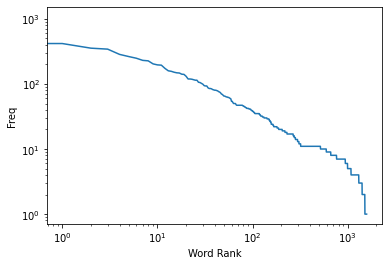

In [101]:
# list of words from tweets
words

# getting the top 30 words and their words counts

for item in [words]:
  c = Counter(item)
  print (c.most_common()[:30]) #top 30 words 
  print

# insert table

pt = PrettyTable(['Words', 'Counts'])
pt.align['Words'] = 'l'
pt.align['Counts'] = 'r'
for row in c.most_common(30):
    pt.add_row(row)
print (pt)


#Insert Plot for top 30 words 
word_counts = sorted(Counter(words).values(), reverse= True)
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [102]:

retweets = [
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            for status in statuses
                if 'retweeted_status' in status.keys()
           ]

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
new_set = set(retweets)
[ pt.add_row(row) for row in sorted(list(new_set), reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)





+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 16339 | deficonnect     | RT @deficonnect: Ladies and gentlemen, we are live |
|       |                 | on @BitrueOfficial..                               |
|       |                 |                                                    |
|       |                 | Trade is now open.. Follow the link to purchase    |
|       |                 | your Dfcs https://…                                |
| 12585 | deficonnect     | RT @deficonnect: Next on the list....🚀            |
|       |                 |                                                    |
|       |                 | DEFIPAY..                                          |
|       |                 |                                                    |
|       |                 | #

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [103]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#List of all hashtags
for item in [hashtags]:
  c = Counter(item)
  h_list = c.most_common()[:10] #raw top 10 hashtags 

hashtag_table = PrettyTable()
hashtag_table.field_names = ['Hashtag', 'Frequency']
for item in h_list:
  hashtag_table.add_row([item[0], item[1]])
print(hashtag_table)


#List of hashtags lowercase
lwrHashtag = [item.lower().strip() for item in hashtags]
mod_list = []
for tag in lwrHashtag:
  if len(tag)> 1 and (tag[:-1] in lwrHashtag):
    mod_list.append(tag[:-1])
  else:
    mod_list.append(tag)
#print(mod_list) debugging

for item in [mod_list]:
  c = Counter(item)
  mod_h_list = c.most_common()[:10] #cleaned top 10 hashtags 

hashtag_mod_table = PrettyTable()
hashtag_mod_table.field_names = ['Hashtag Group', 'Frequency']
for item in mod_h_list:
  hashtag_mod_table.add_row([item[0], item[1]])
print(hashtag_mod_table)

#User mentions
for item in [user_mentions]:
  c = Counter(item)
  name_frequency = (c.most_common()[:10]) #raw top 10 user mentions. Doesn't need to be inorganic since mentions are a unique identifier 
  
mentions_table = PrettyTable()
mentions_table.field_names = ['User Name', 'Mentions']
for item in name_frequency:
  mentions_table.add_row([item[0], item[1]])
print(mentions_table)

+--------------+-----------+
|   Hashtag    | Frequency |
+--------------+-----------+
|     NFT      |    404    |
| NFTCommunity |     93    |
| NFTGiveaway  |     83    |
|     NFTs     |     78    |
|   NFTdrop    |     45    |
|     nft      |     44    |
|     ETH      |     33    |
|   rarible    |     22    |
|   ethereum   |     22    |
| nonfungible  |     22    |
+--------------+-----------+
+---------------+-----------+
| Hashtag Group | Frequency |
+---------------+-----------+
|      nft      |    535    |
|  nftcommunity |     93    |
|  nftgiveaway  |     83    |
|    nftdrop    |     54    |
|   metaverse   |     34    |
|      eth      |     33    |
|     nftart    |     23    |
|    rarible    |     22    |
|    ethereum   |     22    |
|  nonfungible  |     22    |
+---------------+-----------+
+----------------+----------+
|   User Name    | Mentions |
+----------------+----------+
|   AlienApeYC   |    94    |
|   HYPEALIENS   |    70    |
|   DeltaWGMI    |    35

* ------------------------

# ***Problem 3 (20 points): Getting "All" friends and "All" followers of a popular user in twitter***


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.



In [105]:





def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw):

    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):

        if wait_period > 3600: # Seconds
            print('Too many retries. Quitting.', file=sys.stderr)
            raise e


        if e.e.code == 401:
            print('Encountered 401 Error (Not Authorized)', file=sys.stderr)
            return None
        elif e.e.code == 404:
            print('Encountered 404 Error (Not Found)', file=sys.stderr)
            return None
        elif e.e.code == 429:
            print('Encountered 429 Error (Rate Limit Exceeded)', file=sys.stderr)
            if sleep_when_rate_limited:
                print("Retrying in 15 minutes...ZzZ...", file=sys.stderr)
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print('...ZzZ...Awake now and trying again.', file=sys.stderr)
                return 2
            else:
                raise e # Caller must handle the rate-limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print('Encountered {0} Error. Retrying in {1} seconds'\
                  .format(e.e.code, wait_period), file=sys.stderr)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function

    wait_period = 2
    error_count = 0

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError as e:
            error_count = 0
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("URLError encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise
        except BadStatusLine as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("BadStatusLine encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise


def get_user_name(twitter_api, user_ids):
  response = make_twitter_request(twitter_api.users.lookup,
                                            user_id=user_ids)
  return (response)

 


#print(json.dumps(response, indent=1))
from functools import partial
from sys import maxsize as maxint


def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):

    assert (screen_name != None) != (user_id != None), "Must have screen_name or user_id, but not both"


    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids,
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids,
                                count=5000)

    friends_ids, followers_ids = [], []

    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"],
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:

        if limit == 0: continue

        cursor = -1
        while cursor != 0:

            # Use make_twitter_request via the partially bound callable
            if screen_name:
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']

            print('Fetched {0} total {1} ids for {2}'.format(len(ids),
                  label, (user_id or screen_name)),file=sys.stderr)


            if len(ids) >= limit or response is None:
                break

    return friends_ids[:friends_limit], followers_ids[:followers_limit]


friends_ids, followers_ids = get_friends_followers_ids(twitter_api,
                                                       screen_name="@Zendaya",
                                                       friends_limit=20,
                                                       followers_limit=20
                                                       )

print(friends_ids)
print(followers_ids)


print()
print("Table of Followers")
pt_followers = PrettyTable(field_names=['ID number', 'User Name'])
for i in range(len(followers_ids)):
  pt_followers.add_row([followers_ids[i], get_user_name(twitter_api, user_ids=followers_ids[i])])
print(pt_followers)

print()
print("Table of Friends")
pt_friends = PrettyTable(field_names=['ID number', 'User Name'])
for i in range(len(friends_ids)):
  pt_friends.add_row([friends_ids[i], get_user_name(twitter_api, user_ids=friends_ids[i])])
print(pt_friends)

#janky way of getting usernames
'''
parameters = str((get_user_name(twitter_api, user_ids=friends_ids[i]))).split(',')  # where get_user_name is screen_name
print (str(parameters[3]).split(' ')[2])
'''


Fetched 1709 total friends ids for @Zendaya
Fetched 5000 total followers ids for @Zendaya


[847922736651313152, 44845304, 229743093, 17799134, 171682730, 489940229, 17054003, 778983966, 20343405, 43632459, 96083767, 243287822, 1341069360249544704, 26918986, 23551374, 602993818, 15933953, 31634255, 3101758602, 3119492625]
[1353741052230967297, 912418900087853056, 4444706236, 1459894786719051776, 950116615470960640, 1488562339649515522, 1485668032085168135, 1475234324173705218, 1488551524351549443, 1424815427016867850, 1488562296184086531, 1488562001827794952, 1250167682613366789, 802638363270385664, 1240376895063162885, 3425404817, 1462121926218944516, 1436392273537757194, 1488562110078533640, 126017164]

Table of Followers
+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

"\nparameters = str((get_user_name(twitter_api, user_ids=friends_ids[i]))).split(',')  # where get_user_name is screen_name\nprint (str(parameters[3]).split(' ')[2])\n"

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [106]:


def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):

    assert (screen_name != None) != (user_id != None), "Must have screen_name or user_id, but not both"


    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids,
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids,
                                count=5000)

    friends_ids, followers_ids = [], []

    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"],
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:

        if limit == 0: continue

        cursor = -1
        while cursor != 0:

            # Use make_twitter_request via the partially bound callable
            if screen_name:
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']

            print('Fetched {0} total {1} ids for {2}'.format(len(ids),
                  label, (user_id or screen_name)),file=sys.stderr)


            if len(ids) >= limit or response is None:
                break

    return friends_ids[:friends_limit], followers_ids[:followers_limit]


friends_ids, followers_ids = get_friends_followers_ids(twitter_api,
                                                       screen_name="@Zendaya",
                                                       friends_limit=20,
                                                       followers_limit=20
                                                       )

print(friends_ids)
print(followers_ids)

common_ids=[]
for i in range(len(friends_ids)):
  if friends_ids[i]==followers_ids[i]:
    common_ids.append(friends_ids[i])
print(common_ids)





Fetched 1709 total friends ids for @Zendaya


[847922736651313152, 44845304, 229743093, 17799134, 171682730, 489940229, 17054003, 778983966, 20343405, 43632459, 96083767, 243287822, 1341069360249544704, 26918986, 23551374, 602993818, 15933953, 31634255, 3101758602, 3119492625]
[1381408201510428674, 1477787612454735874, 2382309745, 1353741052230967297, 912418900087853056, 4444706236, 1459894786719051776, 950116615470960640, 1488562339649515522, 1485668032085168135, 1475234324173705218, 1488551524351549443, 1424815427016867850, 1488562296184086531, 1488562001827794952, 1250167682613366789, 802638363270385664, 1240376895063162885, 3425404817, 1462121926218944516]
[]


Fetched 5000 total followers ids for @Zendaya


*------------------------

# ***Problem 4 (20 points): Business Question***

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

Our business question is how to determine the signs that an NFT collection will blow up. The NFT community is largely based on Twitter. Twitter is how NFT creators spread news of their work and also garner attention. NFT collections are often successful because of the hype and community built around it.  

To really dive deep into data analysis for this project, we would need much more time. So, as a starting point, we analyzed tweets using the key words, "discord", "ETH", and "NFT collection".


1. We think that NFT tweets or accounts that mention Discord (a popular instant messaging, digital distribution platform) are a sign that that particular NFT collection will do better in terms of sales. The implication of using Discord is that creators are building a community, stories, and connections to their collection, thus making people more willing to pay money for the NFT. 

From the tweets gathered you can see how account owners are pushing for people to follow, turn on notifications, and join external community building sites like Discord. 

In [107]:
# key word
q = 'discord'

# number of tweets we want
total_results = []
id_table = []
count = 200 # Number of desired tweets
query = True #true if you want a brand new query, false if you want to use pre-existing data
query_complete = False #always keep false

#While we want to query and the full request isn't complete, pull from twitter and add to JSON
while query and (not query_complete):
    search_results = twitter_api.search.tweets(q=q, count=count)
    tmp_statuses = search_results['statuses']
    total_results = total_results + tmp_statuses
    print(f"Gathered [{len(total_results)}/{count}] tweets")
    if len(total_results) >= count:
      query_complete = True
      print("Done Querying")


if query:
  # open and write to json file
  with open("problem4Discord.json", "w") as outfile:
      json.dump(total_results, outfile)

#now load all tweets from json
f = open('problem4Discord.json',)
total_results = json.load(f)

statuses = total_results
status_texts = [status['text'] for status in statuses ]

print(statuses)


# getting most popular tweets

retweets = [
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            for status in statuses
                if 'retweeted_status' in status.keys()
           ]

print()
print("Most Popular Tweets about 'Discord'")
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])

new_set = set(retweets)
[ pt.add_row(row) for row in sorted(list(new_set), reverse=True)[:10] ]

pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)


Gathered [100/200] tweets
Gathered [200/200] tweets
Done Querying
[{'created_at': 'Tue Feb 01 17:21:31 +0000 2022', 'id': 1488563173170896899, 'id_str': '1488563173170896899', 'text': 'RT @StonedPuppies: IF THIS GETS 150 RETWEETS I WILL RELEASE ANOTHER 100 DISCORD SLOTS.\n\nHAVE NOTIFICATIONS ON.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'StonedPuppies', 'name': 'Stoned Puppy Project', 'id': 1481323254992318466, 'id_str': '1481323254992318466', 'indices': [3, 17]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1478075379382251524, 'id_str': '1478075379382251524', 'name': 'Robert Ramer', 'screen_name': 'RawbNFT', 'location': '', 

2. We think the key word "ETH" will be relevant because that is the (crypto)currency used to purchase NFTs.

From the tweets gathered, we can see that most people who do publish their NFT prices on Twitter usually just mention a "floor" or "mint" starting price rather than the current one. This is because the prices of NFTs can fluxuate within minutes. Especially as it gets sold from one person to another, NFTs can blast up in price. Many of the tweets also seem to act like announcements, notifying followers of giveaways, when certain NFTs are minting, or giving them a countdown to special events/mintings.

In [108]:


# key word
q = 'ETH'

# number of tweets we want
total_results = []
id_table = []
count = 200 # Number of desired tweets
query = True #true if you want a brand new query, false if you want to use pre-existing data
query_complete = False #always keep false

#While we want to query and the full request isn't complete, pull from twitter and add to JSON
while query and (not query_complete):
    search_results = twitter_api.search.tweets(q=q, count=count)
    tmp_statuses = search_results['statuses']
    total_results = total_results + tmp_statuses
    print(f"Gathered [{len(total_results)}/{count}] tweets")
    if len(total_results) >= count:
      query_complete = True
      print("Done Querying")


if query:
  # open and write to json file
  with open("problem4ETH.json", "w") as outfile:
      json.dump(total_results, outfile)

#now load all tweets from json
f = open('problem4ETH.json',)
total_results = json.load(f)

statuses = total_results
status_texts = [status['text'] for status in statuses ]

print(statuses)


# getting most popular tweets

retweets = [
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            for status in statuses
                if 'retweeted_status' in status.keys()
           ]

print()
print("Most Popular Tweets about 'ETH'")
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])

new_set = set(retweets)
[ pt.add_row(row) for row in sorted(list(new_set), reverse=True)[:10] ]

pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)





Gathered [100/200] tweets
Gathered [200/200] tweets
Done Querying
[{'created_at': 'Tue Feb 01 17:21:40 +0000 2022', 'id': 1488563210584309761, 'id_str': '1488563210584309761', 'text': 'RT @0xApeMaxi: #0xApes Floor Price Below 1 ETH is a crime ! \n\nRetweet if you agree 💛\n@0xApes_NFT #0xApes #0xApesTrilogy #yellowarmy #NFT #O…', 'truncated': False, 'entities': {'hashtags': [{'text': '0xApes', 'indices': [15, 22]}, {'text': '0xApes', 'indices': [97, 104]}, {'text': '0xApesTrilogy', 'indices': [105, 119]}, {'text': 'yellowarmy', 'indices': [120, 131]}, {'text': 'NFT', 'indices': [132, 136]}], 'symbols': [], 'user_mentions': [{'screen_name': '0xApeMaxi', 'name': '0xApe | Maxi', 'id': 1184260629693005825, 'id_str': '1184260629693005825', 'indices': [3, 13]}, {'screen_name': '0xApes_NFT', 'name': '0xApes', 'id': 1474048827938201603, 'id_str': '1474048827938201603', 'indices': [85, 96]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http:

3. To look more into general tweets on NFTs, we gathered tweets with the keyword "NFT collection 

In [109]:

# key word
q = 'NFT collection'

# number of tweets we want
total_results = []
id_table = []
count = 100 # Number of desired tweets
query = True #true if you want a brand new query, false if you want to use pre-existing data
query_complete = False #always keep false

#While we want to query and the full request isn't complete, pull from twitter and add to JSON
while query and (not query_complete):
    search_results = twitter_api.search.tweets(q=q, count=count)
    tmp_statuses = search_results['statuses']
    total_results = total_results + tmp_statuses
    print(f"Gathered [{len(total_results)}/{count}] tweets")
    if len(total_results) >= count:
      query_complete = True
      print("Done Querying")


if query:
  # open and write to json file
  with open("problem4NFT.json", "w") as outfile:
      json.dump(total_results, outfile)

#now load all tweets from json
f = open('problem4NFT.json',)
total_results = json.load(f)

statuses = total_results
status_texts = [status['text'] for status in statuses ]

print(statuses)


# getting most popular tweets

retweets = [
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            for status in statuses
                if 'retweeted_status' in status.keys()
           ]

print()
print("Most Popular Tweets about 'NFT Collection'")
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])

new_set = set(retweets)
[ pt.add_row(row) for row in sorted(list(new_set), reverse=True)[:10] ]

pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)



Gathered [78/100] tweets
Gathered [156/100] tweets
Done Querying
[{'created_at': 'Tue Feb 01 17:21:49 +0000 2022', 'id': 1488563247980900358, 'id_str': '1488563247980900358', 'text': "RT @FleakyNFT: FREE BAYC #NFT GIVEAWAY FROM MY COLLECTION! \nThis is crazy! Thank you so much guys, I'm going to send this Bored Ape NFT to…", 'truncated': False, 'entities': {'hashtags': [{'text': 'NFT', 'indices': [25, 29]}], 'symbols': [], 'user_mentions': [{'screen_name': 'FleakyNFT', 'name': 'Fleaky - NFT PROMOTER', 'id': 1144288963047374849, 'id_str': '1144288963047374849', 'indices': [3, 13]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1483691957335764992, 'id_str': '1483691957335764992', 'nam

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10-15 minutes talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA (dyou@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS3010 Case Study 1 Team 11
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 100 **


---------------------------------------------------------------------------
** Notebook results:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.





---------------------------------------------------------------------------
**Slides (for presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

